In [93]:
import sklearn as sk
from sklearn import datasets

from sklearn.linear_model import LogisticRegression, Perceptron, LinearRegression, BayesianRidge, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.datasets import fetch_california_housing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
from numpy.random import shuffle
import pandas as pd

In [38]:
url = "https://raw.githubusercontent.com/koroteevmv/ML_course/2024/ML4.1%20metrics/heart.csv"
df = pd.read_csv(url)
X = df.drop("output", axis= 1)
y = df["output"]
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
log_test = LogisticRegression().fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
log_test.score(X, y)

0.8547854785478548

In [41]:
X_train, y_train = X[:200], y[:200]
X_test, y_test = X[200:], y[200:]

In [42]:
log_test = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
log_test.score(X_train, y_train), log_test.score(X_test, y_test)

(0.9, 0.5436893203883495)

In [44]:
N = int(X.shape[0] * 0.8)
X_train, y_train, X_test, y_test = X[:N], y[:N], X[N:], y[N:]

In [45]:
log_test = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
log_test.score(X_train, y_train), log_test.score(X_test, y_test)

(0.8884297520661157, 0.6229508196721312)

In [47]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [48]:
mask = np.array([True] * N + [False] * (y.shape[0] - N))

In [49]:
shuffle(mask)
mask

array([ True, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,

In [50]:
X_train, y_train, X_test, y_test = X[mask], y[mask], X[~mask], y[~mask]

In [51]:
log_test = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
log_test.score(X_train, y_train), log_test.score(X_test, y_test)

(0.8636363636363636, 0.8524590163934426)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8)

In [54]:
y_test_pred = log_test.predict(X_test)
y_train_pred = log_test.predict(X_train)

In [55]:
confusion_matrix(y_train, y_train_pred)

array([[ 83,  28],
       [  6, 125]])

In [56]:
confusion_matrix(y_test, y_test_pred)

array([[23,  4],
       [ 4, 30]])

In [57]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [58]:
precision_score(y_test, y_test_pred)

0.8823529411764706

In [59]:
def metrics_table(y_train, y_train_pred, y_test, y_test_pred):
    metrics = pd.DataFrame({
        "Train": [
            accuracy_score(y_train, y_train_pred),
            precision_score(y_train, y_train_pred),
            recall_score(y_train, y_train_pred),
            f1_score(y_train, y_train_pred),
        ],
        "Test": [
            accuracy_score(y_test, y_test_pred),
            precision_score(y_test, y_test_pred),
            recall_score(y_test, y_test_pred),
            f1_score(y_test, y_test_pred),
        ],
    }, index = ["Accuracy", "Precision", "Recall", "F1"])

    return metrics


def metrics_table_test(y_test, y_test_pred):
    metrics = pd.DataFrame({
        "Test": [
            accuracy_score(y_test, y_test_pred),
            precision_score(y_test, y_test_pred),
            recall_score(y_test, y_test_pred),
            f1_score(y_test, y_test_pred),
        ],
    }, index = ["Accuracy", "Precision", "Recall", "F1"])

    return metrics

metrics_table(y_train, y_train_pred, y_test, y_test_pred)

,Train,Test
Accuracy,0.859504,0.868852
Precision,0.816993,0.882353
Recall,0.954198,0.882353
F1,0.880282,0.882353


1. Повторите анализ для других видов моделей. Используйте 5-10 разных классов моделей. Подсчитывайте только метрики на тестовой выборке.

In [60]:
perc_test = Perceptron().fit(X_train, y_train)
svcrbf_test = SVC(kernel= "rbf").fit(X_train, y_train)
linsvc_test = LinearSVC().fit(X_train, y_train)
mlp_test = MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8, 8,)).fit(X_train, y_train)
tree_test = DecisionTreeClassifier().fit(X_train, y_train)
neig_test = KNeighborsClassifier().fit(X_train, y_train)
mult_test = MultinomialNB().fit(X_train, y_train)
bern_test = BernoulliNB().fit(X_train, y_train)
cat_test = CategoricalNB().fit(X_train, y_train)
comp_test = ComplementNB().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Perceptron

In [61]:
y_test_pred = perc_test.predict(X_test)
metrics_table_test(y_test, y_test_pred)

,Test
Accuracy,0.704918
Precision,0.690476
Recall,0.852941
F1,0.763158


SVC rbf (метод опорных векторов с гауссовым ядром)

In [62]:
y_test_pred = svcrbf_test.predict(X_test)
metrics_table_test(y_test, y_test_pred)

,Test
Accuracy,0.688525
Precision,0.674419
Recall,0.852941
F1,0.753247


LinearSVC (метод опорных векторов с линейным ядром)

In [63]:
y_test_pred = linsvc_test.predict(X_test)
metrics_table_test(y_test, y_test_pred)

,Test
Accuracy,0.770492
Precision,0.717391
Recall,0.970588
F1,0.825000


MLPClassifier (многослойный перцептрон)

In [64]:
y_test_pred = mlp_test.predict(X_test)
metrics_table_test(y_test, y_test_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Test
Accuracy,0.442623
Precision,0.000000
Recall,0.000000
F1,0.000000


DecisionTreeClassifier (дерево решений)

In [65]:
y_test_pred = tree_test.predict(X_test)
metrics_table_test(y_test, y_test_pred)

,Test
Accuracy,0.819672
Precision,0.848485
Recall,0.823529
F1,0.835821


KNeighborsClassifier (метод K ближайших соседей)

In [66]:
y_test_pred = neig_test.predict(X_test)
metrics_table_test(y_test, y_test_pred)

,Test
Accuracy,0.688525
Precision,0.800000
Recall,0.588235
F1,0.677966


MultinomialNB (мультиномиальный наивный Байесс)

In [67]:
y_test_pred = mult_test.predict(X_test)
metrics_table_test(y_test, y_test_pred)

,Test
Accuracy,0.770492
Precision,0.833333
Recall,0.735294
F1,0.781250


BernoulliNB (Бернули наивный Байесс)

In [68]:
y_test_pred = bern_test.predict(X_test)
metrics_table_test(y_test, y_test_pred)

,Test
Accuracy,0.836066
Precision,0.900000
Recall,0.794118
F1,0.843750


CategorialNB (категориальный наивный Байесс)

In [69]:
# y_test_pred = cat_test.predict(X_test)
# metrics_table_test(y_test, y_test_pred)

ComplementNB (комплементарный наивный Байесс)

In [70]:
y_test_pred = comp_test.predict(X_test)
metrics_table_test(y_test, y_test_pred)

,Test
Accuracy,0.770492
Precision,0.833333
Recall,0.735294
F1,0.781250


2. Повторите анализ для другого датасета по вашему выбору. Используйте несколько моделей для сравнения. Используйте датасет для множественной классификации.

In [71]:
iris = datasets.load_iris()
X = pd.DataFrame(iris["data"])
y = pd.DataFrame(iris["target"])
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [72]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8)

In [74]:
tree_test = DecisionTreeClassifier().fit(X_train, y_train)
svc_test = SVC(kernel= "rbf").fit(X_train, y_train)
neig_test = KNeighborsClassifier().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


DecisionTreeClassifier (дерево решений)

In [75]:
y_test_pred = tree_test.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9333333333333333

SVC rbf (метод опорных векторов с гауссовым ядром)

In [76]:
y_test_pred = svc_test.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9333333333333333

KNeighborsClassifier (метод K ближайших соседей)

In [77]:
y_test_pred = neig_test.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9666666666666667

3. Повторите анализ для датасета, предназначенного для решения задачи регрессии. Используйте все метрики качества регрессии, изученные на лекции. Постройте 5 - 10 разных моделей регрессии.

In [87]:
data = fetch_california_housing()
X = data.data
y = data.target

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8)

In [107]:
def metrics_table_reg(y_train, y_train_pred, y_test, y_test_pred):
      metrics = pd.DataFrame({
          "Train": [
              mean_absolute_error(y_train, y_train_pred),
              mean_squared_error(y_train, y_train_pred),
              r2_score(y_train, y_train_pred),
              mean_absolute_percentage_error(y_train, y_train_pred),
          ],
          "Test": [
              mean_absolute_error(y_test, y_test_pred),
              mean_squared_error(y_test, y_test_pred),
              r2_score(y_test, y_test_pred),
              mean_absolute_percentage_error(y_test, y_test_pred),
          ],
      }, index = ["MAE", "MSE", "R2", "MAPE"])

      return metrics

In [95]:
gb_reg = GradientBoostingRegressor().fit(X_train, y_train)
svr = SVR().fit(X_train, y_train)
br = BayesianRidge().fit(X_train, y_train)
lin_reg = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)

In [109]:
y_train_pred = gb_reg.predict(X_train)
y_test_pred = gb_reg.predict(X_test)
print("GradientBoostingRegressor")
metrics_table_reg(y_train, y_train_pred, y_test, y_test_pred)

GradientBoostingRegressor


,Train,Test
MAE,0.357288,0.360625
MSE,0.264217,0.264675
R2,0.801471,0.801578
MAPE,0.203754,0.208244


In [110]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
print("Support Vector Machine")
metrics_table_reg(y_train, y_train_pred, y_test, y_test_pred)

Support Vector Machine


,Train,Test
MAE,0.869240,0.869182
MSE,1.361770,1.377127
R2,-0.023217,-0.032407
MAPE,0.518950,0.504393


In [111]:
y_train_pred = br.predict(X_train)
y_test_pred = br.predict(X_test)
print("Bayesian Ridge Regression")
metrics_table_reg(y_train, y_train_pred, y_test, y_test_pred)

Bayesian Ridge Regression


,Train,Test
MAE,0.532360,0.529688
MSE,0.527343,0.514755
R2,0.603761,0.614097
MAPE,0.316735,0.320548


In [112]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
print("Linear Regression")
metrics_table_reg(y_train, y_train_pred, y_test, y_test_pred)

Linear Regression


,Train,Test
MAE,0.532322,0.529656
MSE,0.527342,0.514781
R2,0.603762,0.614078
MAPE,0.316711,0.320522


In [113]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print("Ridge")
metrics_table_reg(y_train, y_train_pred, y_test, y_test_pred)

Ridge


,Train,Test
MAE,0.532331,0.529664
MSE,0.527342,0.514775
R2,0.603762,0.614083
MAPE,0.316717,0.320528


Дополнительные задания

1. Постройте график зависимости метрик качества классификации из методических указаний от процента выборки, отводимого на тестовую часть.

In [129]:
url = "https://raw.githubusercontent.com/koroteevmv/ML_course/2024/ML4.1%20metrics/heart.csv"
df = pd.read_csv(url)
X = df.drop("output", axis= 1)
y = df["output"]

In [152]:
ax_x = []
ax_y = []

for i in np.linspace(0.05, 0.95, 19):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= i)
  log_test = LogisticRegression().fit(X_train, y_train)
  y_pred = log_test.predict(X_test)
  ax_x.append(i)
  ax_y.append([accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)])

ax_x = np.asarray(ax_x)
ax_y = np.asarray(ax_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

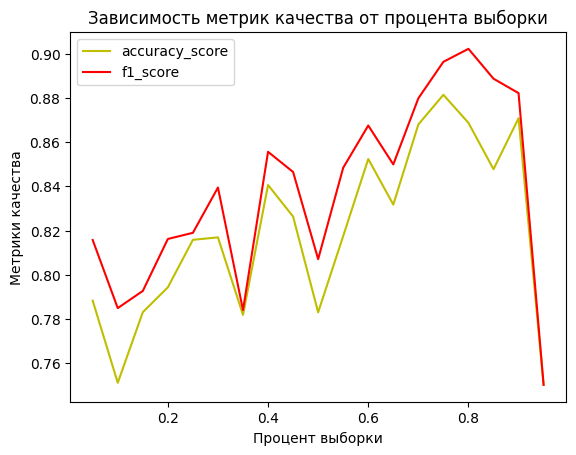

In [163]:
plt.plot(ax_x, ax_y[:, 0], color= "y")
plt.plot(ax_x, ax_y[:, 1], color= "r")
plt.title("Зависимость метрик качества от процента выборки")
plt.xlabel("Процент выборки")
plt.ylabel("Метрики качества")
plt.legend(["accuracy_score", "f1_score"])
plt.show()

array([0.78819444, 0.75091575, 0.78294574, 0.79423868, 0.81578947,
       0.81690141, 0.78172589, 0.84065934, 0.82634731, 0.78289474,
       0.81751825, 0.85245902, 0.8317757 , 0.86813187, 0.88157895,
       0.86885246, 0.84782609, 0.87096774, 0.75      ])